In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from prophet import Prophet

In [4]:
df =  pd.read_csv('avocado.csv')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df = df.sort_values('Date')

In [12]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


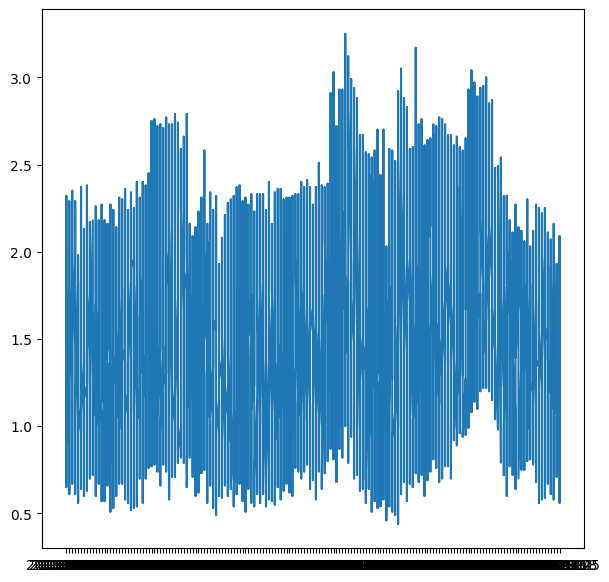

In [15]:
plt.figure(figsize= (7,7))
plt.plot(df['Date'], df['AveragePrice'])

/Users/ammoa380/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

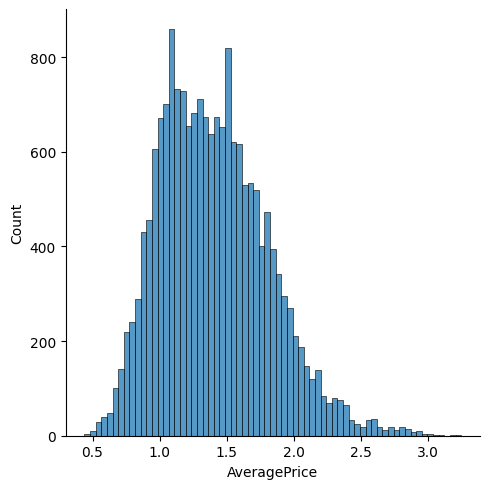

In [17]:
plt.figure(figsize= (6,6))
sns.displot(df['AveragePrice'])

<Axes: xlabel='type', ylabel='AveragePrice'>

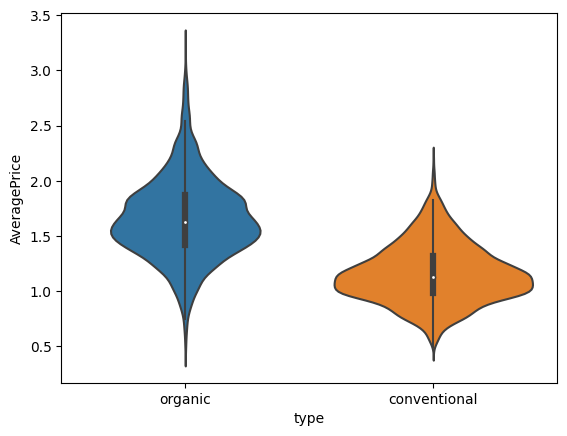

In [21]:
sns.violinplot(y= 'AveragePrice',x= 'type', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

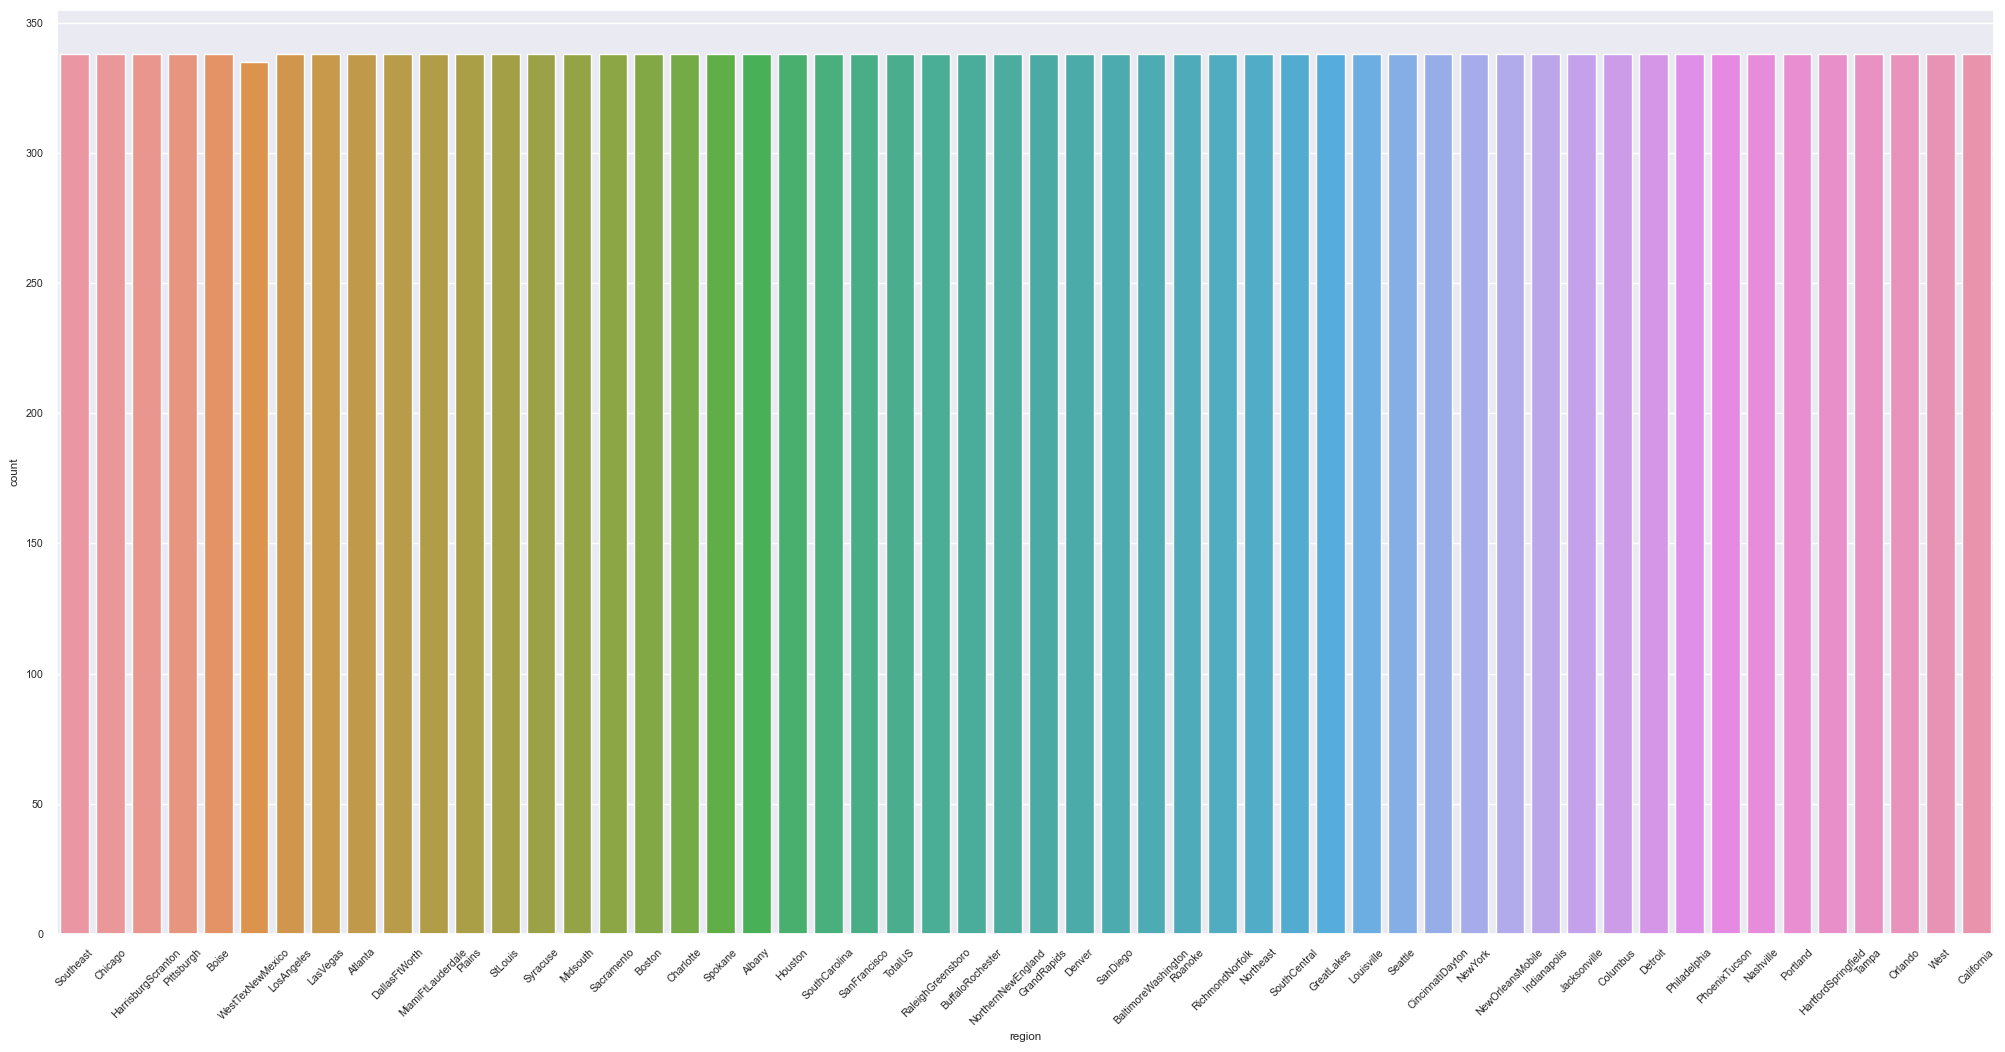

In [27]:
sns.set(font_scale=0.7)
plt.figure(figsize=(25,12))
sns.countplot(x='region', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

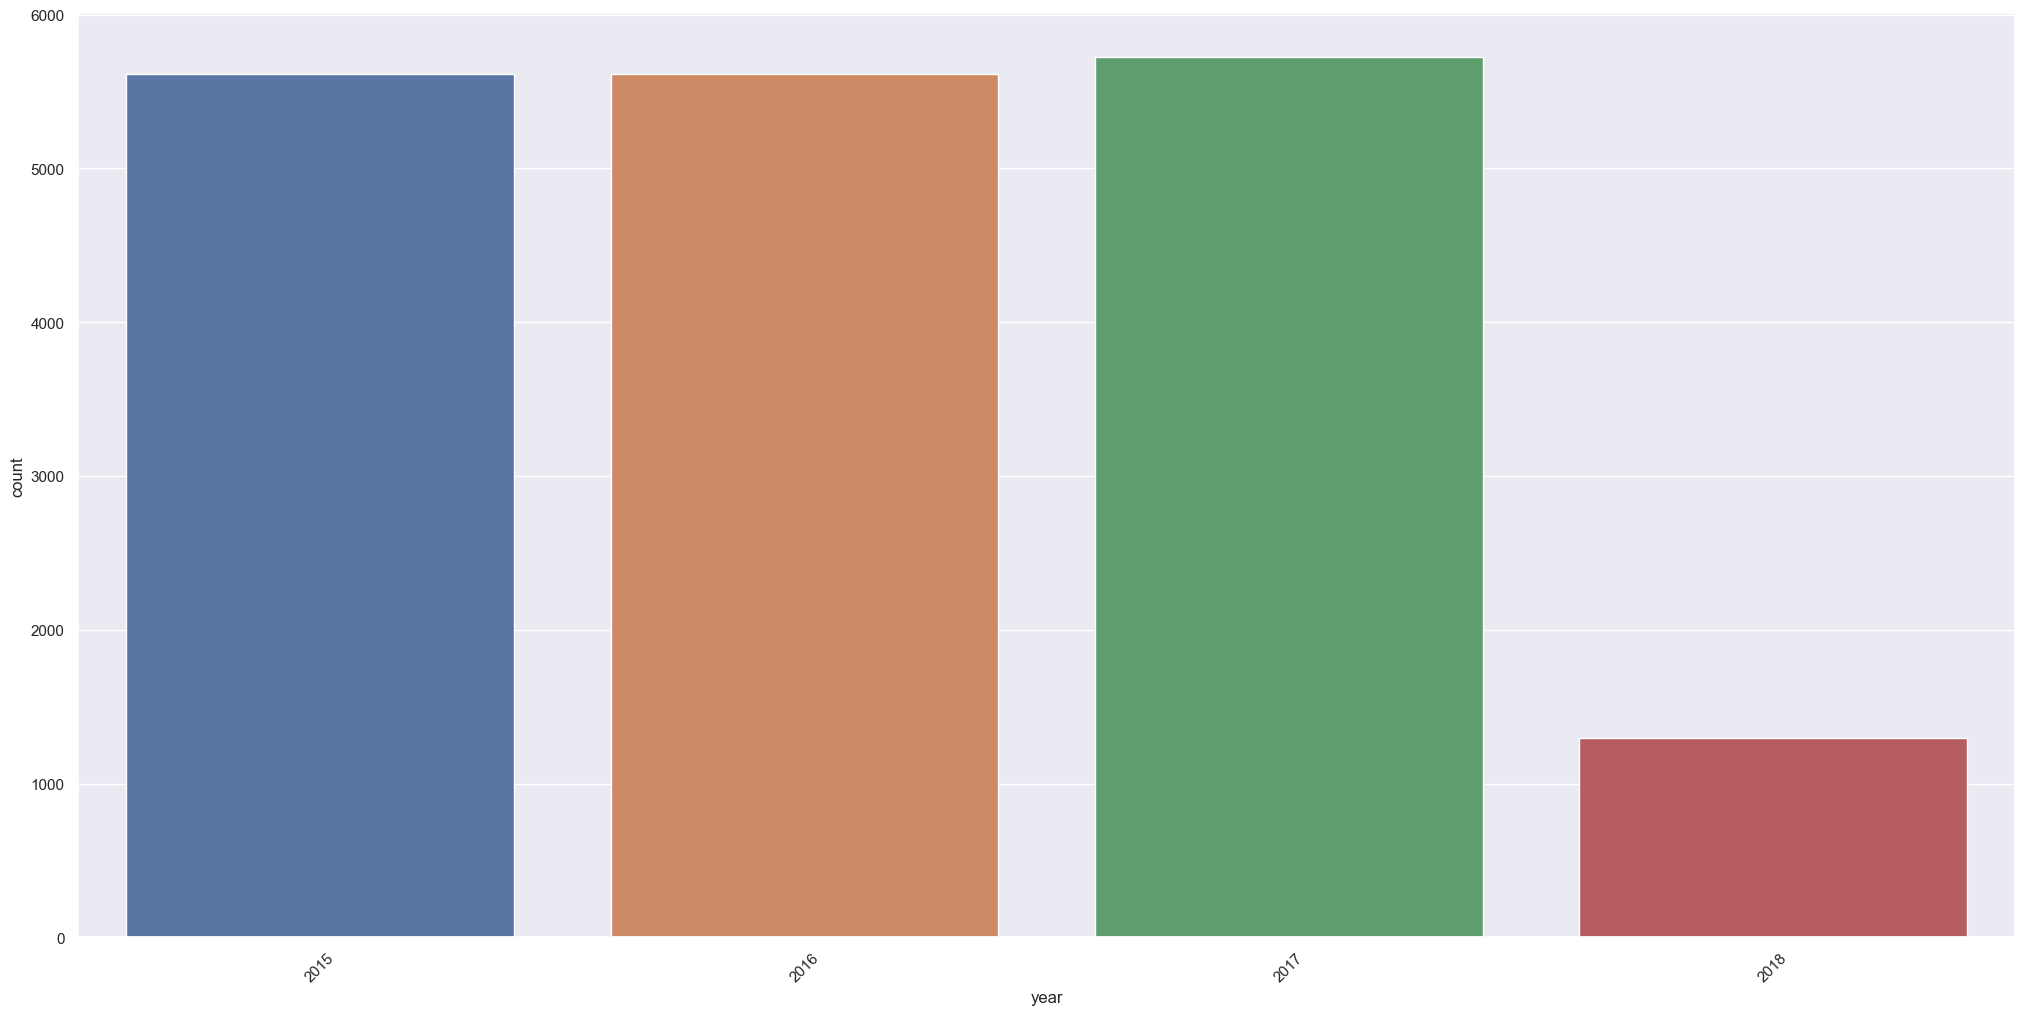

In [29]:
sns.set(font_scale=1)
plt.figure(figsize=(25,12))
sns.countplot(x='year', data=df)
plt.xticks(rotation=45)

/Users/ammoa380/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


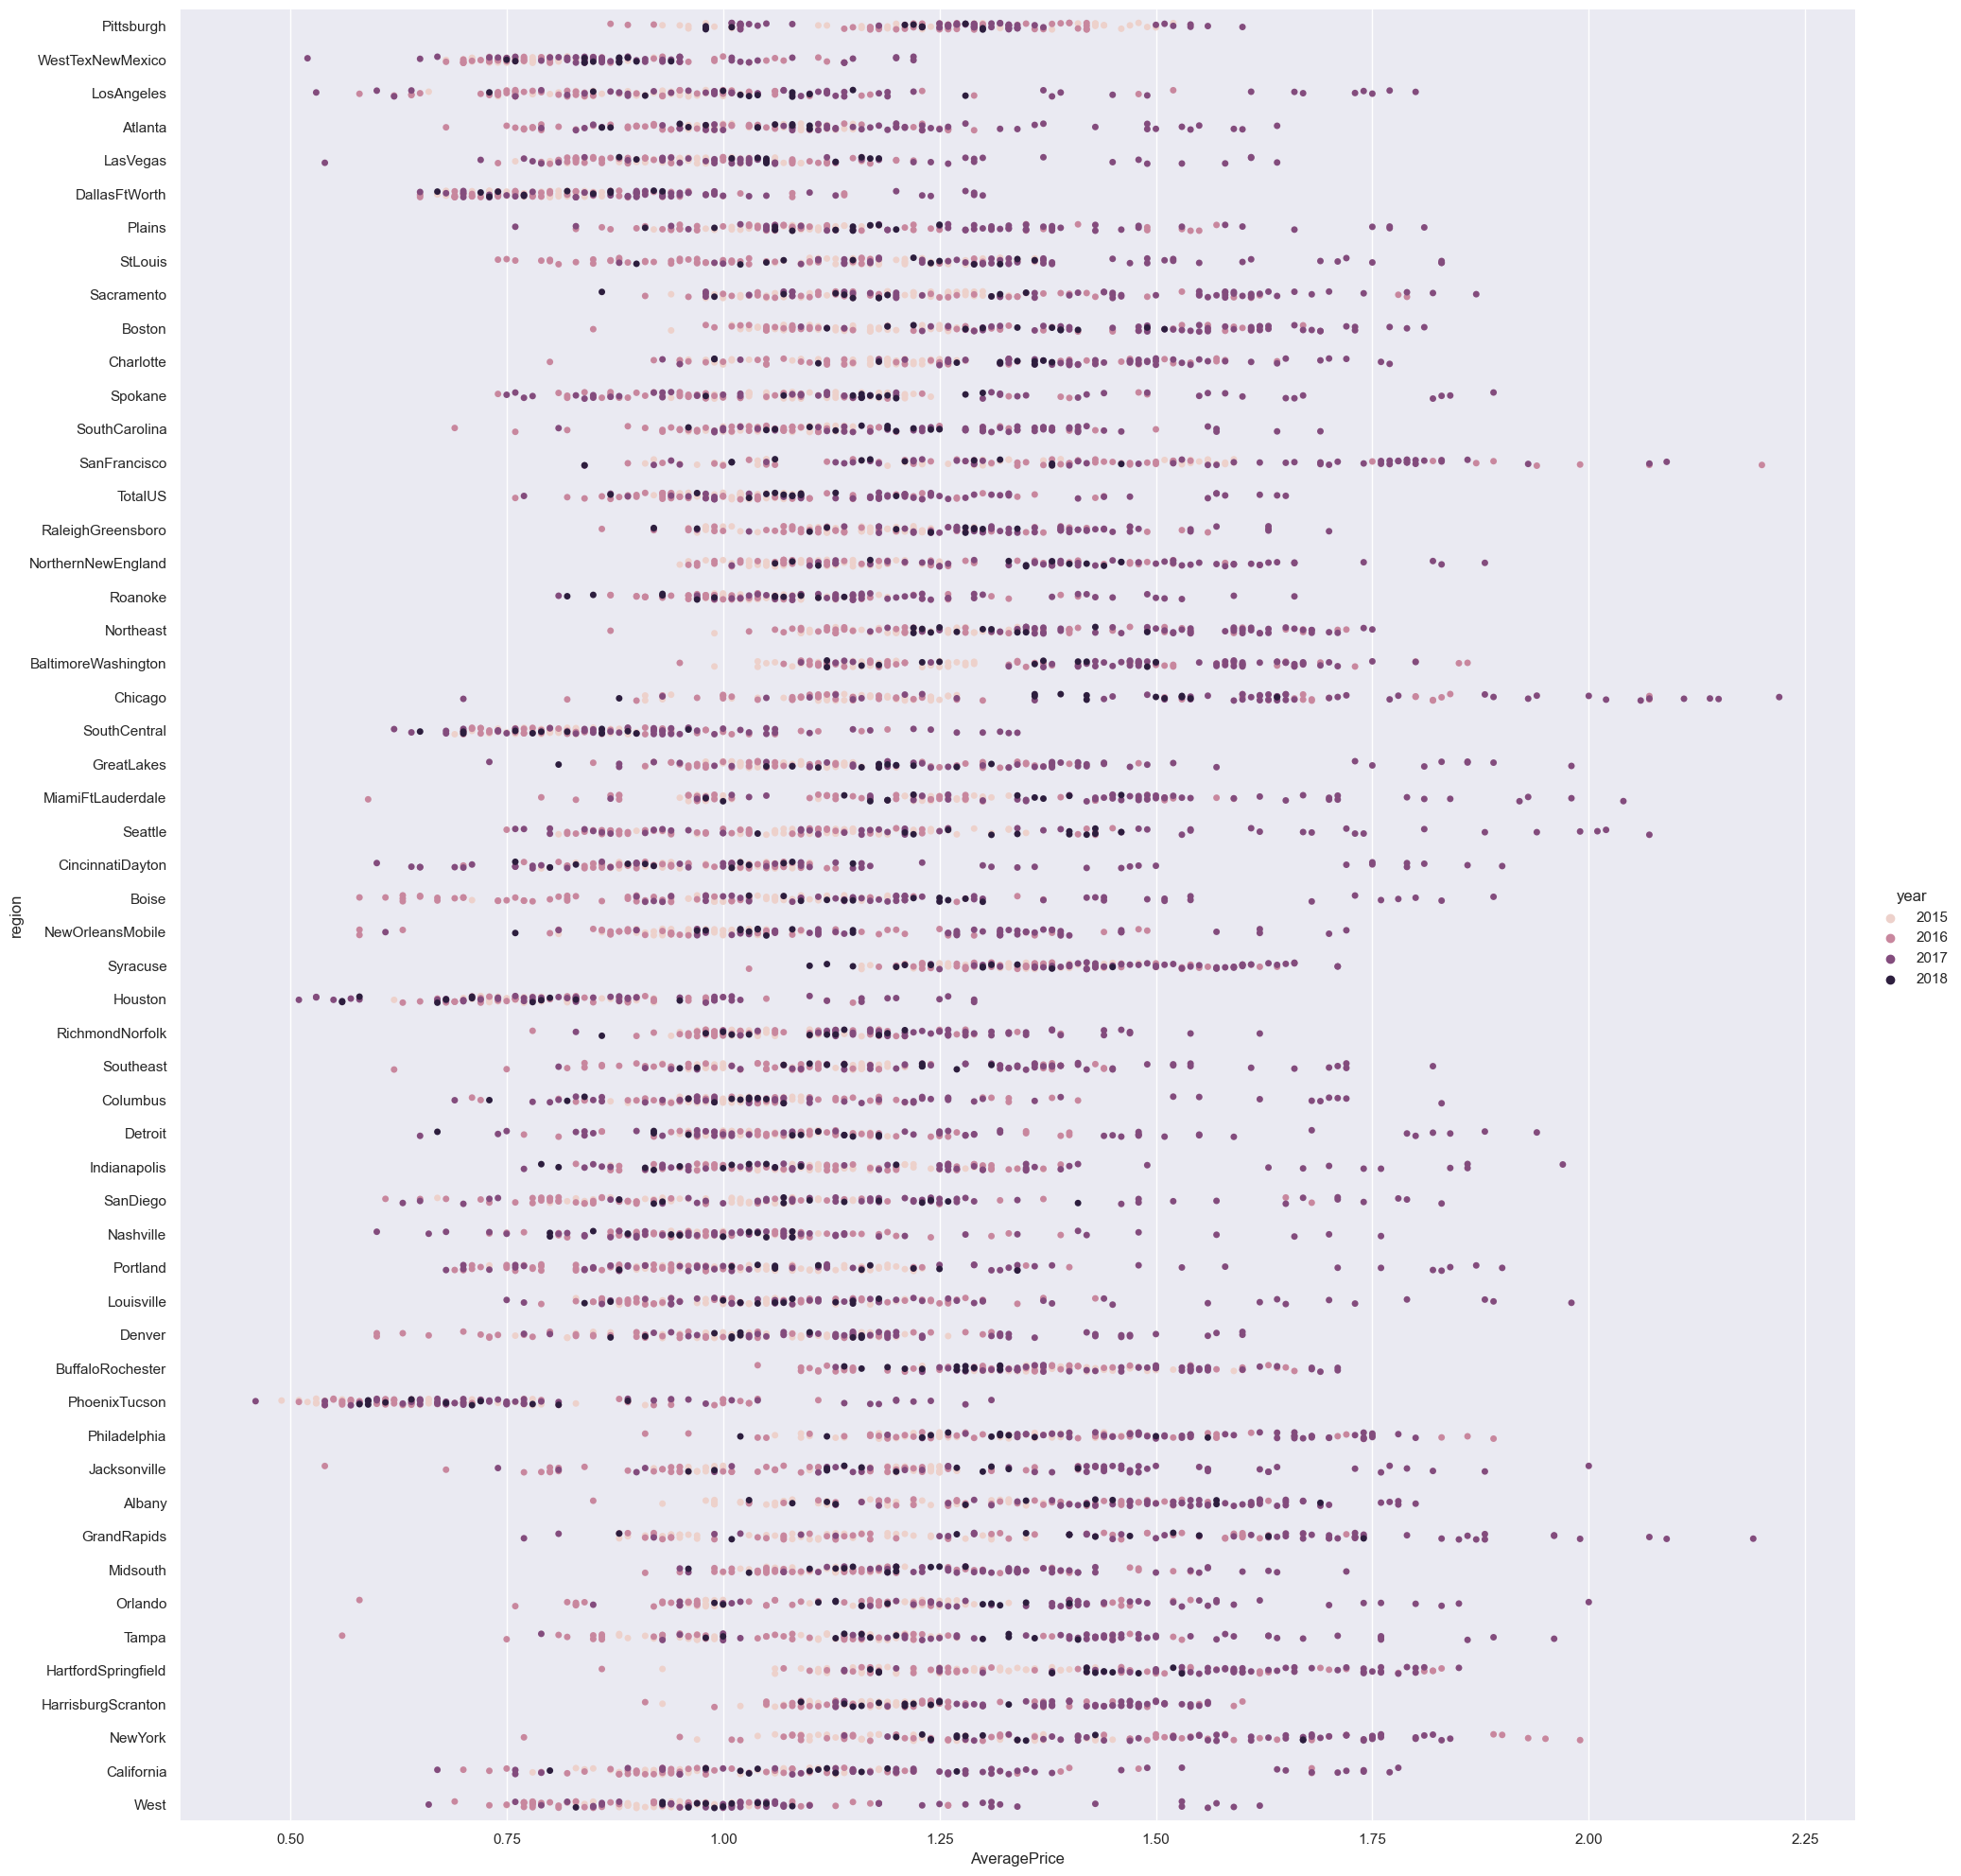

In [39]:
#Avocado prices vs region for conventional avocados
conventional_data = df[df['type']=='conventional']
conv = sns.catplot(x='AveragePrice', y='region', data=conventional_data, hue='year', height=20)


/Users/ammoa380/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


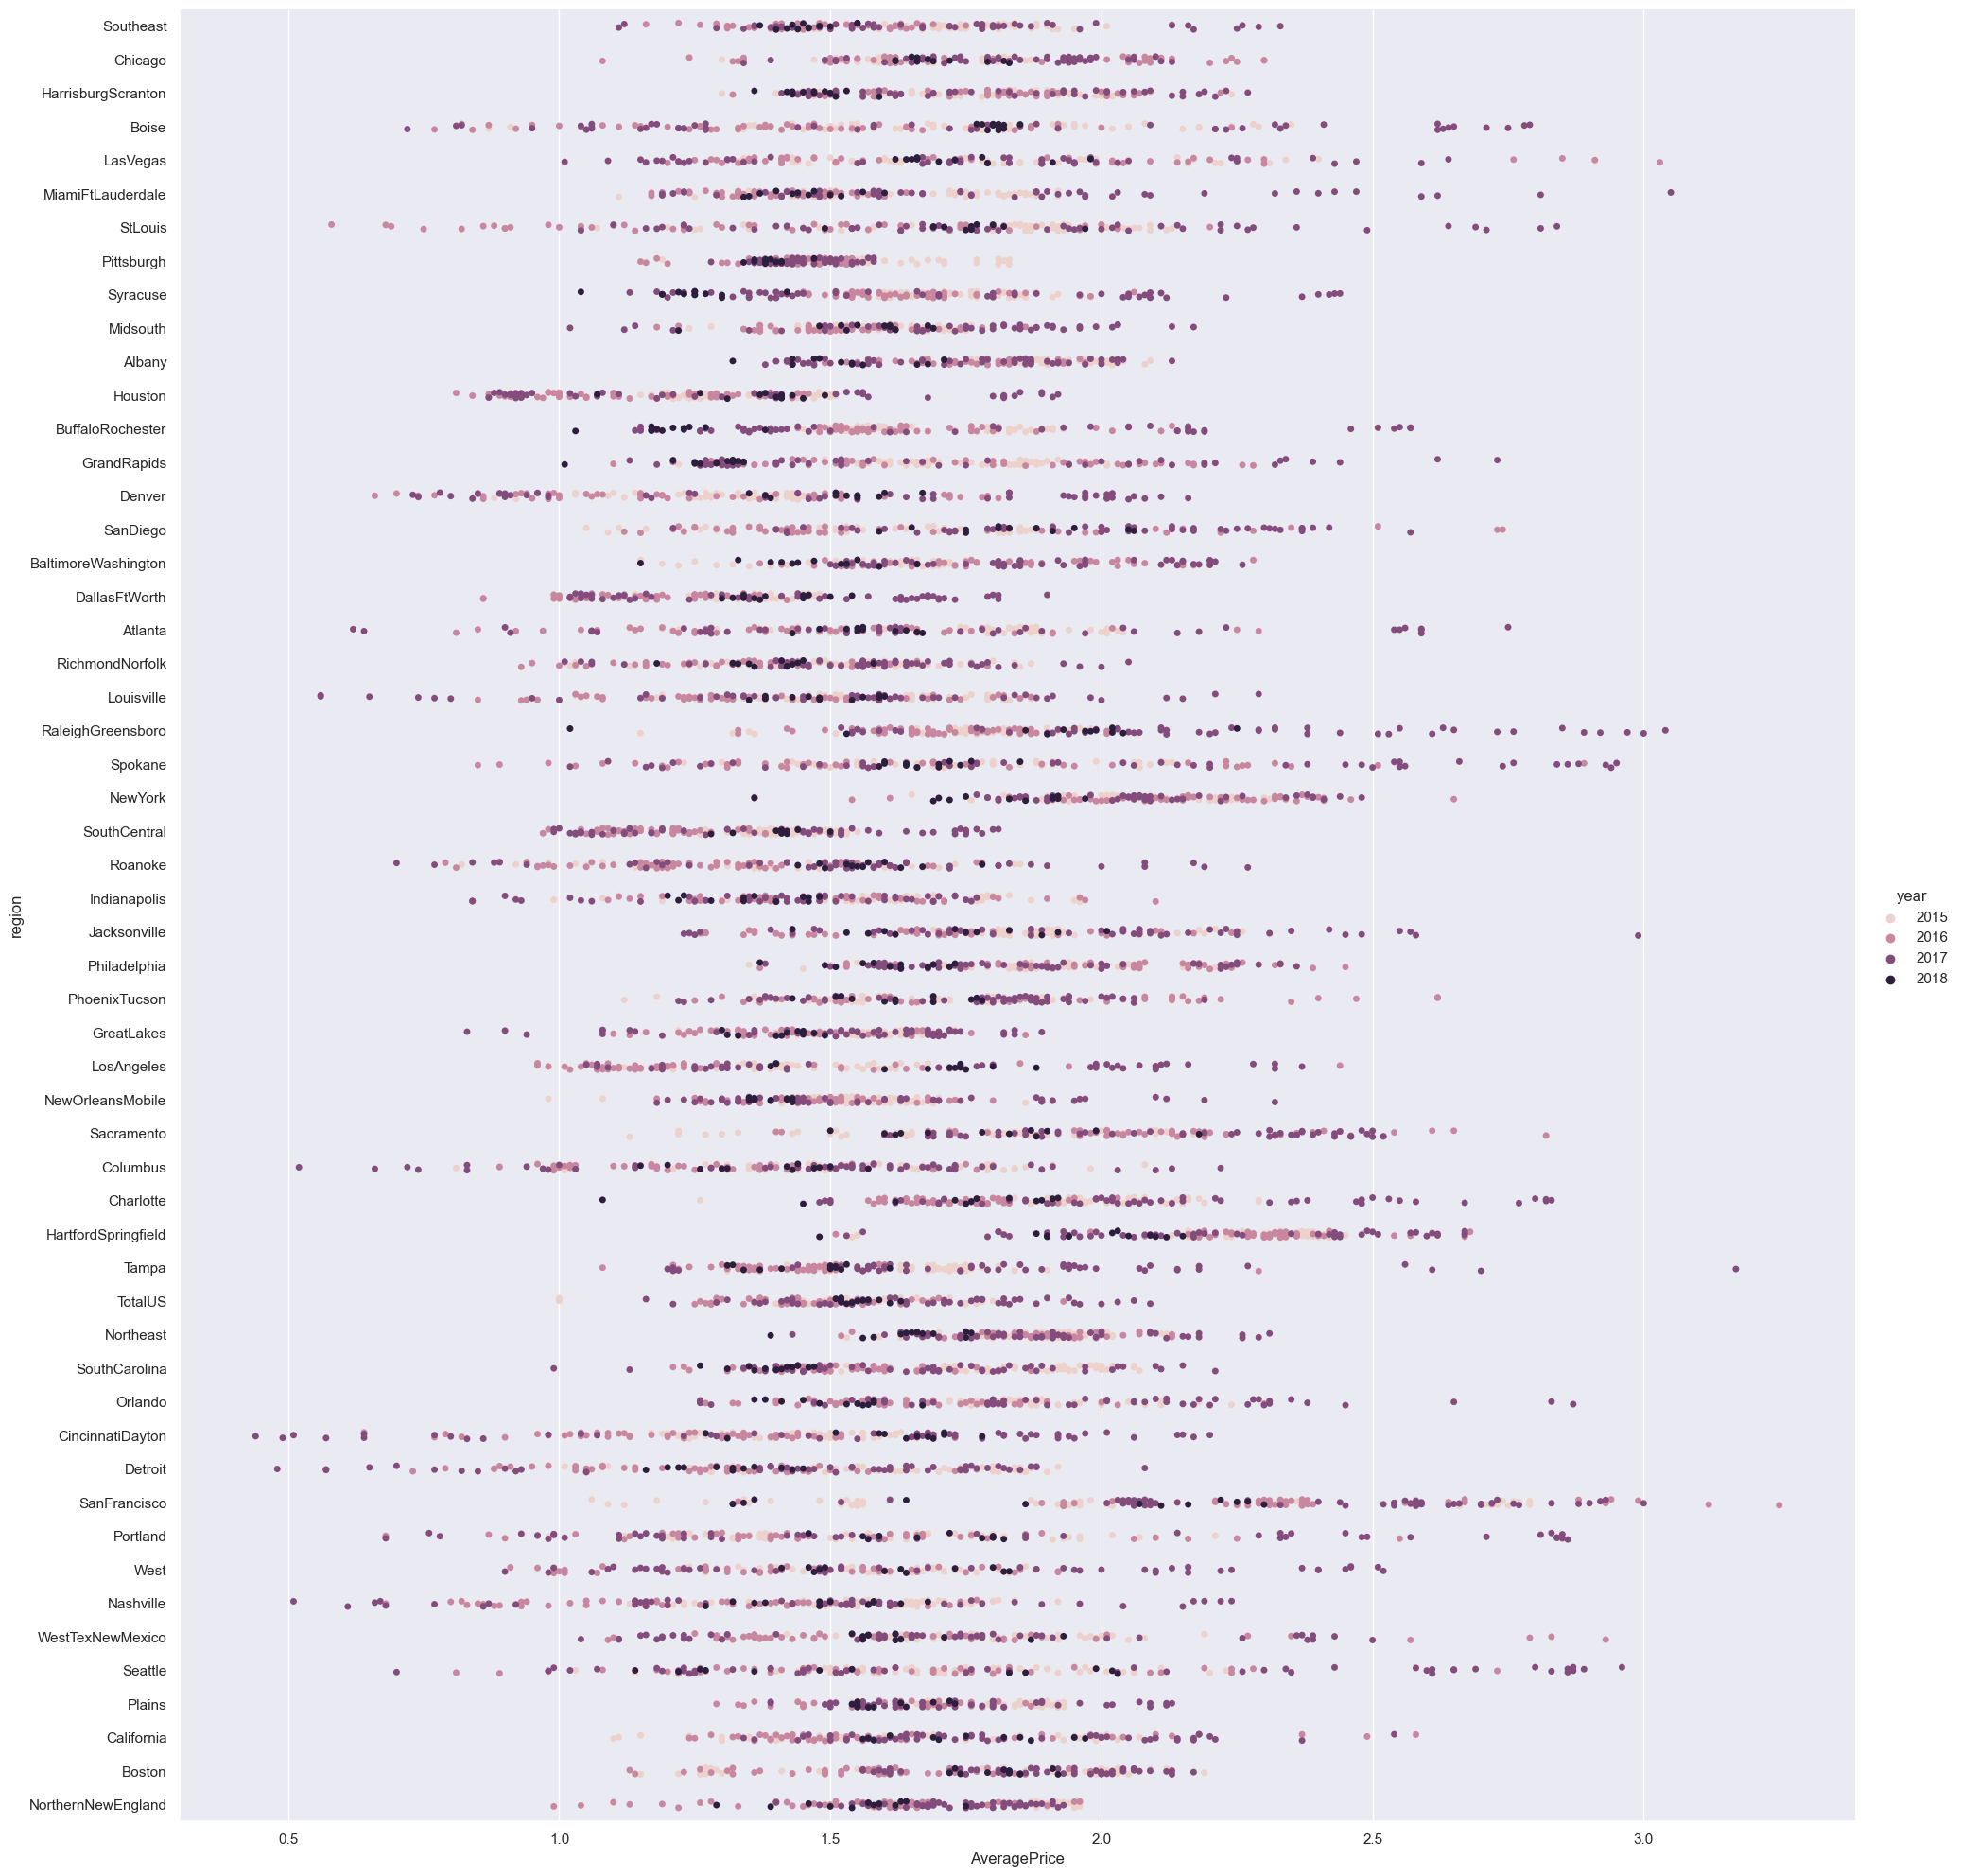

In [41]:
#Avocado prices vs region for organic avocados
conventional_data = df[df['type']=='organic']
conv = sns.catplot(x='AveragePrice', y='region', data=conventional_data, hue='year', height=20)

In [43]:
#task4
pdf = df[['Date', 'AveragePrice']]

In [44]:
pdf.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [45]:
pdf = pdf.rename(columns= {'Date': 'ds', 'AveragePrice': 'y'})

In [46]:
pdf.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [47]:
#Task6
m = Prophet()
m.fit(pdf)

16:59:19 - cmdstanpy - INFO - Chain [1] start processing
16:59:21 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499638,0.898710,1.899782,1.499638,1.499638,-0.114491,-0.114491,-0.114491,-0.114491,-0.114491,-0.114491,0.0,0.0,0.0,1.385147
1,2015-01-11,1.494392,0.896832,1.852022,1.494392,1.494392,-0.106095,-0.106095,-0.106095,-0.106095,-0.106095,-0.106095,0.0,0.0,0.0,1.388297
2,2015-01-18,1.489146,0.900263,1.882927,1.489146,1.489146,-0.105739,-0.105739,-0.105739,-0.105739,-0.105739,-0.105739,0.0,0.0,0.0,1.383407
3,2015-01-25,1.483900,0.889281,1.874956,1.483900,1.483900,-0.124602,-0.124602,-0.124602,-0.124602,-0.124602,-0.124602,0.0,0.0,0.0,1.359299
4,2015-02-01,1.478655,0.863193,1.785822,1.478655,1.478655,-0.152836,-0.152836,-0.152836,-0.152836,-0.152836,-0.152836,0.0,0.0,0.0,1.325818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.162522,0.552304,1.571526,0.971411,1.348625,-0.086244,-0.086244,-0.086244,-0.086244,-0.086244,-0.086244,0.0,0.0,0.0,1.076278
530,2019-03-22,1.161791,0.548506,1.604119,0.970123,1.348876,-0.084541,-0.084541,-0.084541,-0.084541,-0.084541,-0.084541,0.0,0.0,0.0,1.077250
531,2019-03-23,1.161060,0.560102,1.615147,0.968849,1.349084,-0.082563,-0.082563,-0.082563,-0.082563,-0.082563,-0.082563,0.0,0.0,0.0,1.078497
532,2019-03-24,1.160329,0.570757,1.633567,0.967576,1.349208,-0.080330,-0.080330,-0.080330,-0.080330,-0.080330,-0.080330,0.0,0.0,0.0,1.079999


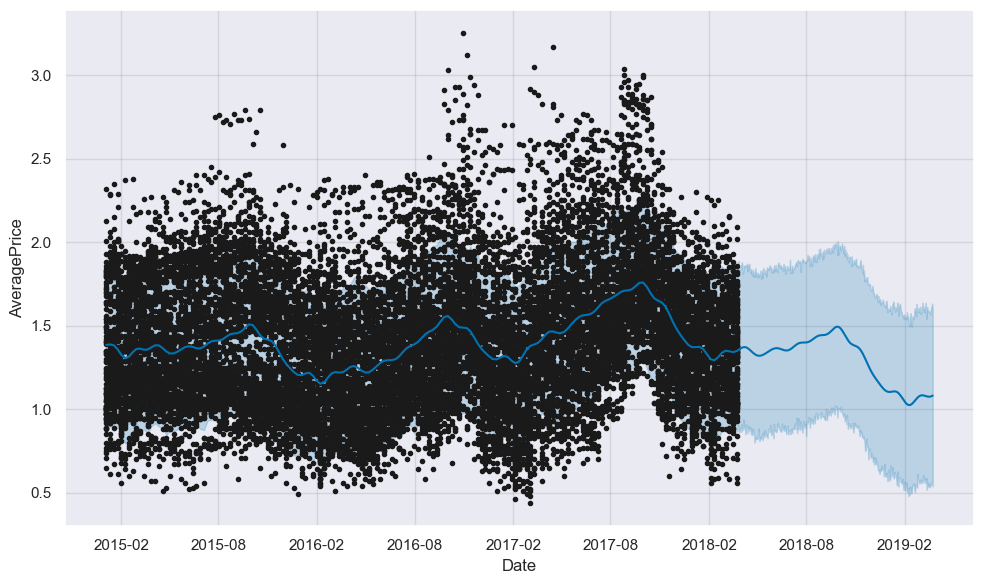

In [52]:
figure = m.plot(forecast, xlabel='Date', ylabel='AveragePrice')

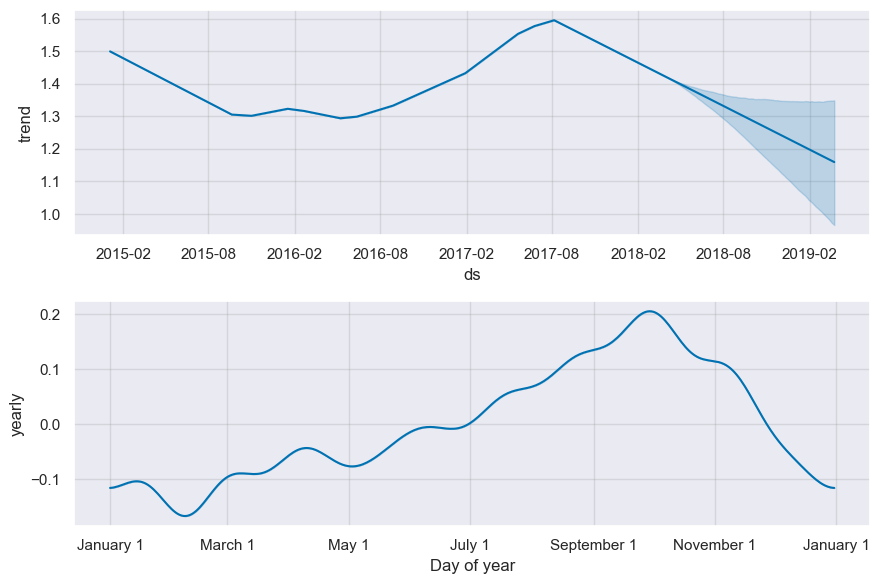

In [53]:
figuretwo = m.plot_components(forecast)

In [54]:
#Task-7
dfs = df[df['region']=='West']

In [55]:
dfs = dfs.sort_values('Date')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

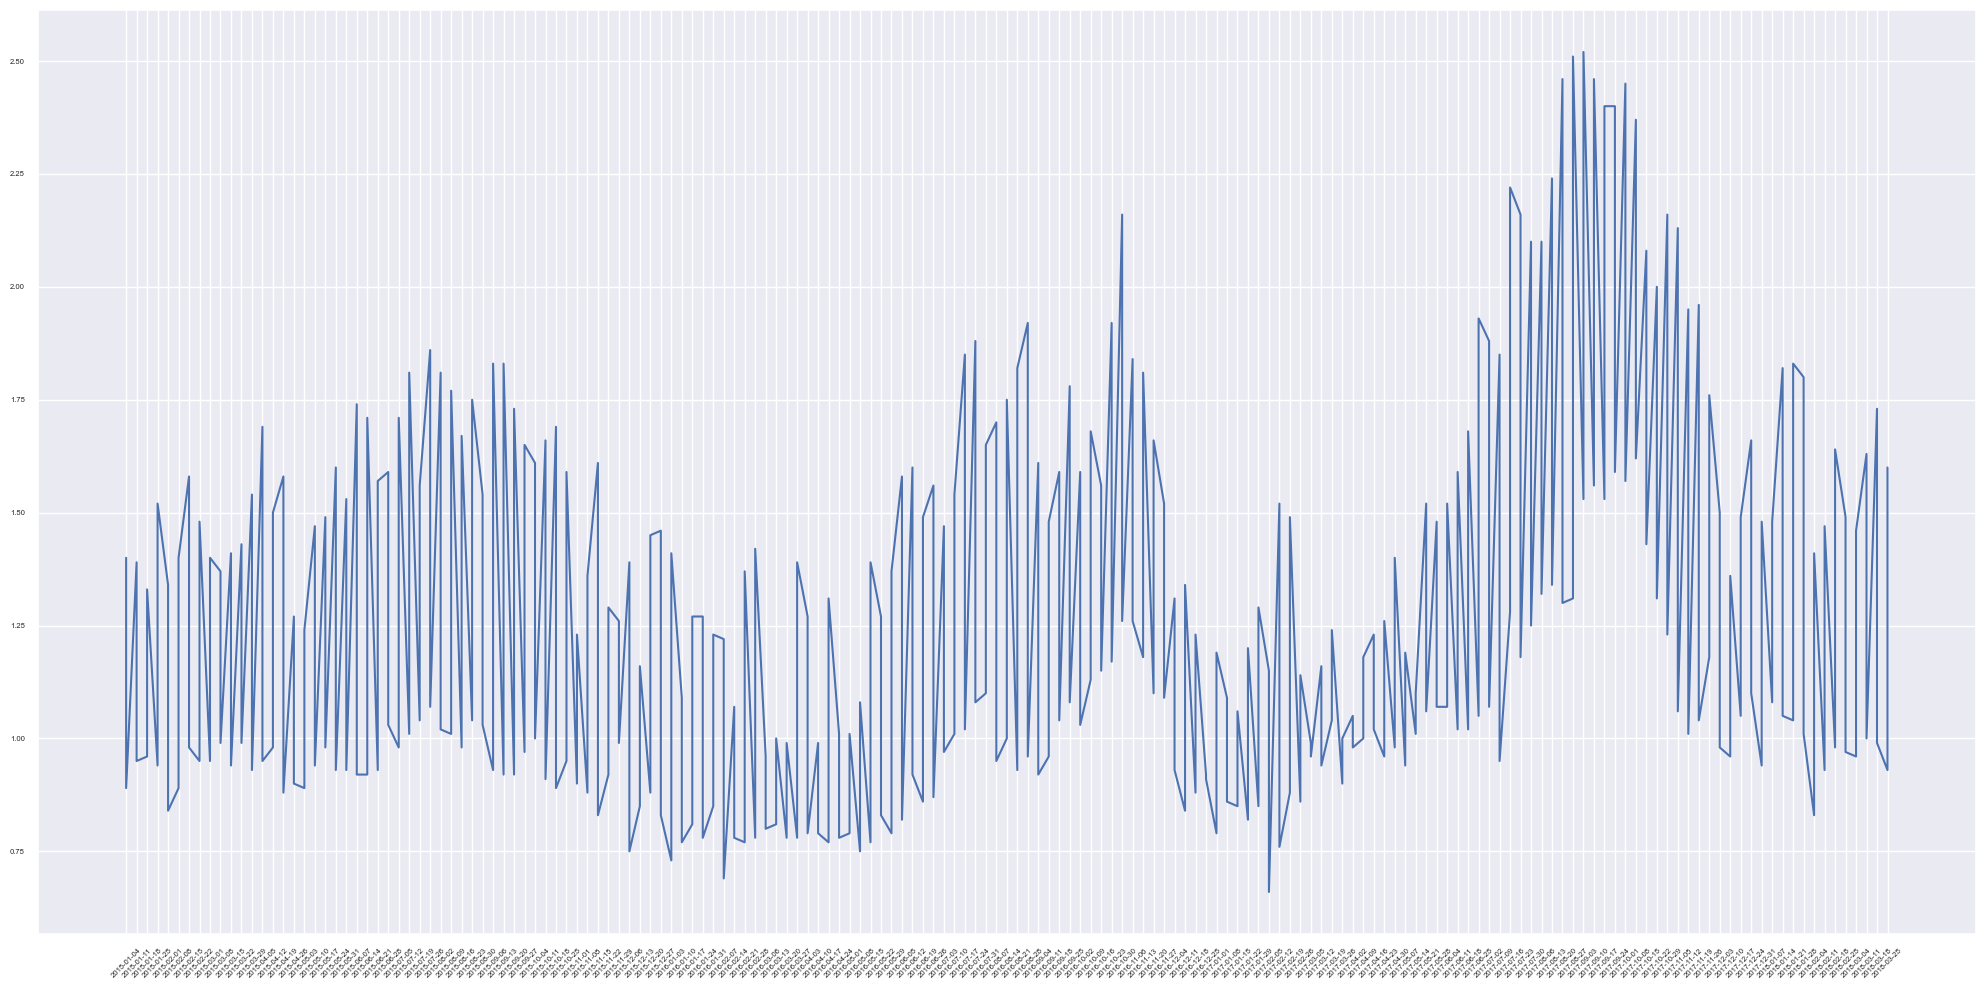

In [62]:
sns.set(font_scale=0.5)
plt.figure(figsize=(25,12))
plt.plot(dfs['Date'], dfs['AveragePrice'])
plt.xticks(rotation=45)

In [63]:
dfs = dfs.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

In [65]:
mr = Prophet()
mr.fit(dfs)
future_r = mr.make_future_dataframe(periods=365)
forecast_r = mr.predict(future_r)

17:18:02 - cmdstanpy - INFO - Chain [1] start processing
17:18:02 - cmdstanpy - INFO - Chain [1] done processing


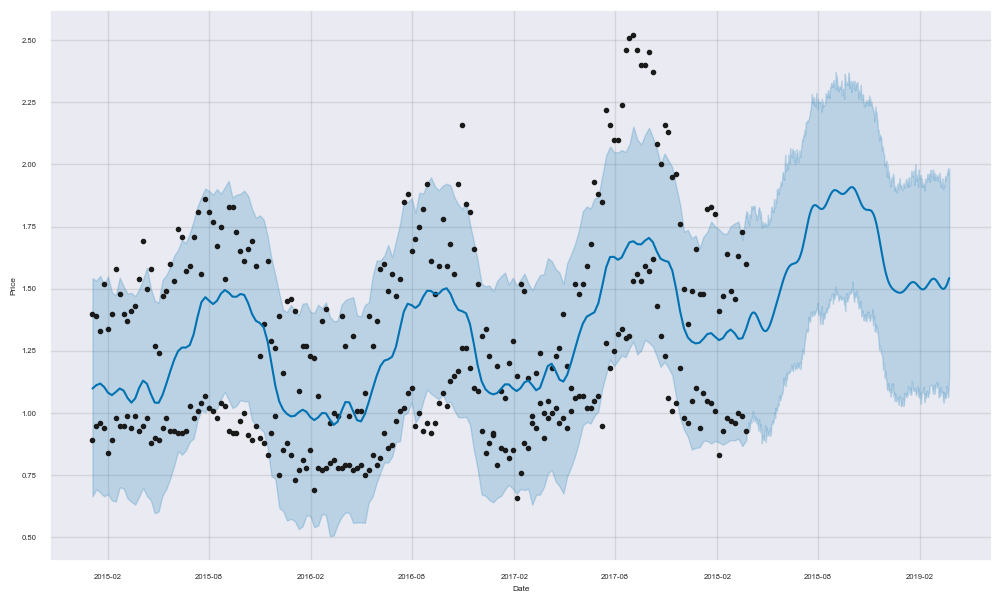

In [69]:
figure_r = mr.plot(forecast_r, xlabel ='Date', ylabel='Price')

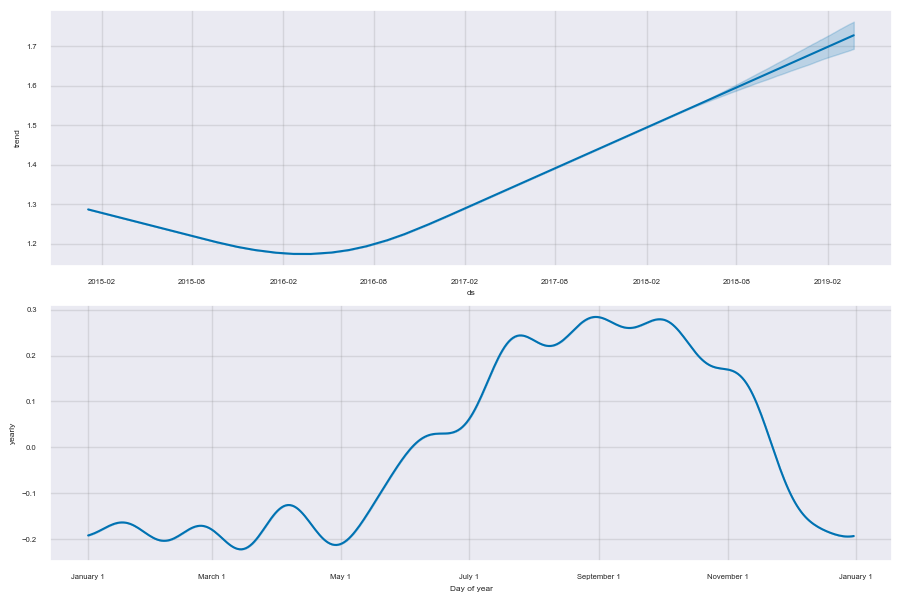

In [70]:
figure_2 = mr.plot_components(forecast_r)

In [71]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()
avocado_df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico
